In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf



In [2]:
data=pd.read_csv(r'C:\\Users\hp\Documents\archive\heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

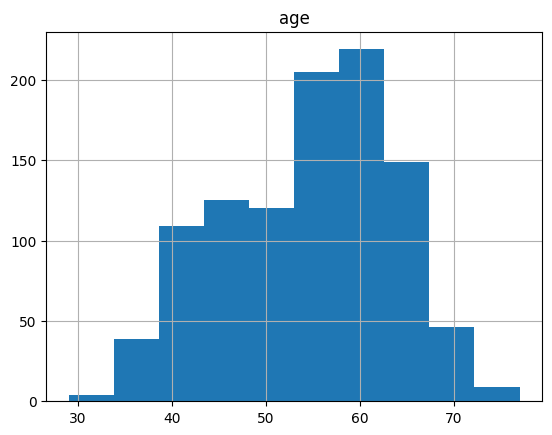

In [4]:
data.hist(column="age")

# Creating an input data separately to add  the noise

In [17]:
new_data=data.loc[:, data.columns!='target']

In [18]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [19]:
# Set parameters for Laplace function implementation
sensitivity=1
epsilon=0.1

#Gets random laplacian noise
#new_data=new_data + np.random.laplace(loc=0,scale = sensitivity/epsilon)


In [129]:
#print(Laplacian_noise)

7.621821880978348


In [22]:
#adding noise to input data
for i in new_data:
    new_data[i]=new_data[i] + np.random.laplace(loc=0,scale = sensitivity/epsilon)
    print(new_data[i])
   
        
    

0       36.290831
1       37.290831
2       54.290831
3       45.290831
4       46.290831
          ...    
1020    43.290831
1021    44.290831
1022    31.290831
1023    34.290831
1024    38.290831
Name: age, Length: 1025, dtype: float64
0       1.370809
1       1.370809
2       1.370809
3       1.370809
4       0.370809
          ...   
1020    1.370809
1021    1.370809
1022    1.370809
1023    0.370809
1024    1.370809
Name: sex, Length: 1025, dtype: float64
0       5.814328
1       5.814328
2       5.814328
3       5.814328
4       5.814328
          ...   
1020    6.814328
1021    5.814328
1022    5.814328
1023    5.814328
1024    5.814328
Name: cp, Length: 1025, dtype: float64
0       137.659104
1       152.659104
2       157.659104
3       160.659104
4       150.659104
           ...    
1020    152.659104
1021    137.659104
1022    122.659104
1023    122.659104
1024    132.659104
Name: trestbps, Length: 1025, dtype: float64
0       193.694534
1       184.694534
2       155.69453

C:\Users\hp\AppData\Local\Temp\ipykernel_5884\426760090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[i]=new_data[i] + np.random.laplace(loc=0,scale = sensitivity/epsilon)


In [23]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,36.290831,1.370809,5.814328,137.659104,193.694534,-43.956132,16.731799,147.824402,6.445655,23.380021,-1.094629,0.858292,-40.36912
1,37.290831,1.370809,5.814328,152.659104,184.694534,-42.956132,15.731799,134.824402,7.445655,25.480021,-3.094629,-1.141708,-40.36912
2,54.290831,1.370809,5.814328,157.659104,155.694534,-43.956132,16.731799,104.824402,7.445655,24.980021,-3.094629,-1.141708,-40.36912
3,45.290831,1.370809,5.814328,160.659104,184.694534,-43.956132,16.731799,140.824402,6.445655,22.380021,-1.094629,-0.141708,-40.36912
4,46.290831,0.370809,5.814328,150.659104,275.694534,-42.956132,16.731799,85.824402,6.445655,24.280021,-2.094629,1.858292,-41.36912


array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

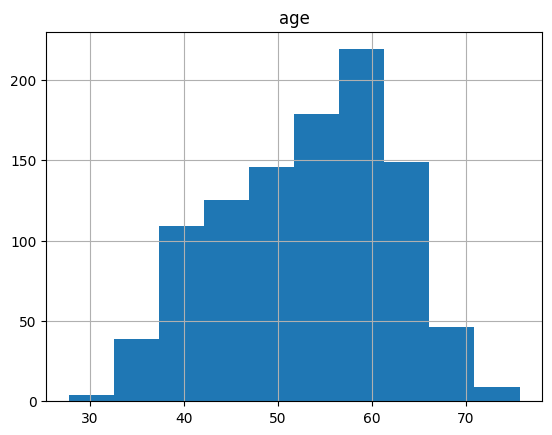

In [132]:
new_data.hist(column="age")

# Creating training and testing dataset

In [133]:
X = np.array(new_data)
y = np.array(data['target'])

In [134]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [135]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [136]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

print(Y_train_binary)
print(Y_test_binary)

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 1 1 0 1 

# Create Model

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [147]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 4ms/step - loss: 0.6518 - accuracy: 0.7549 - val_loss: 0.5879 - val_accuracy: 0.8293
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.8415 - val_loss: 0.4519 - val_accuracy: 0.8244
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8244 - val_loss: 0.3869 - val_accuracy: 0.8439
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8561 - val_loss: 0.3632 - val_accuracy: 0.8488
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8573 - val_loss: 0.3496 - val_accuracy: 0.8341
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8573 - val_loss: 0.3413 - val_accuracy: 0.8439
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8598 - val_loss: 0.3302 - val_accuracy: 0.8585
Epoch 8/50
82/82 [==

# Testing accuracy

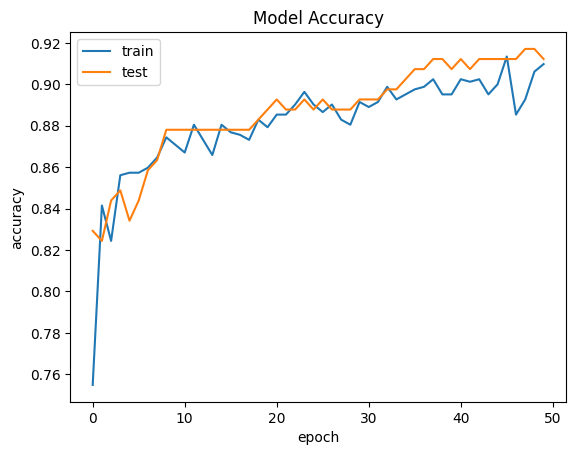

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

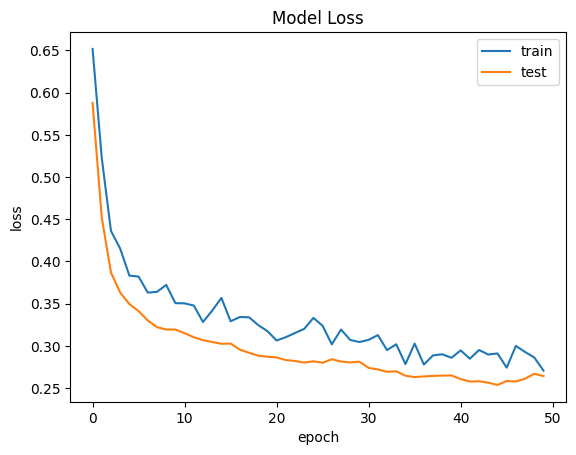

In [151]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [152]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 [==============================] - 0s 2ms/step
Results for Binary Model
0.9121951219512195
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.89      0.94      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

